In [2]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [3]:

file_path = "/Users/yuanhang/Desktop/UCLA/2024 spring/441 lab /w1/TaylorRuleData.csv"
data = pd.read_csv(file_path, index_col=0)

In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data.dropna(inplace=True)

In [6]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split1 = int(len(data)*.6)
split2 = int(len(data)*.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [10]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]#第一行
X_out =data_out.iloc[:,1:] 
y_out =data_out.iloc[:,0] 
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

# Add Constants

In [11]:
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [16]:
model1 = sm.OLS(y_in,X_in).fit()

In [17]:
model1.params

const            3.475026
Unemployment     0.530746
HousingStarts   -0.000481
Inflation        0.007728
dtype: float64

# 4.) Recreate the graph for your model

In [21]:
import matplotlib.pyplot as plt

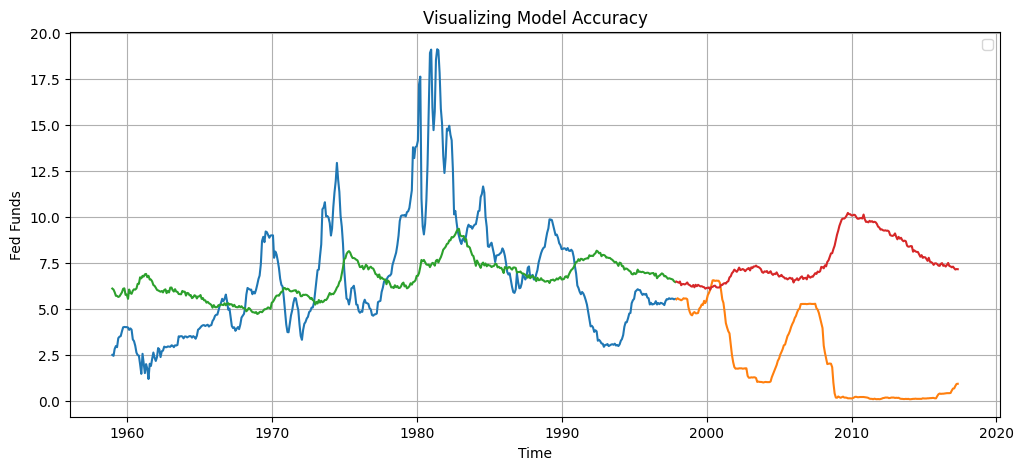

In [28]:
plt.figure(figsize = (12,5))
#需要得到in out和hold的预测结果
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))


plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()
#可能是assumption是错的，也可能是underfit，看起来线的区别比较大

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 =mean_squared_error(model1.predict(X_out),y_out) 

In [32]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835668566


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
#degrees=2
#x1,x1----x1方 x1x2 x2方

degree: 1


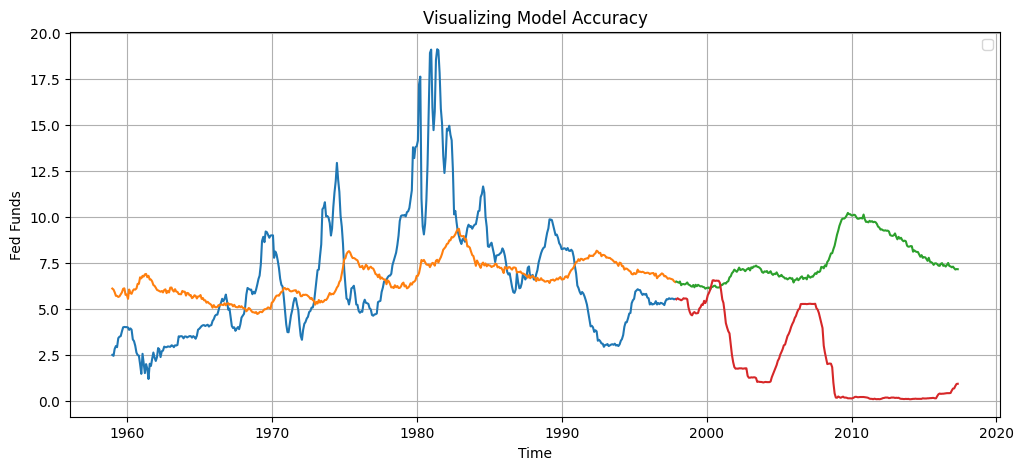

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565212
degree: 2


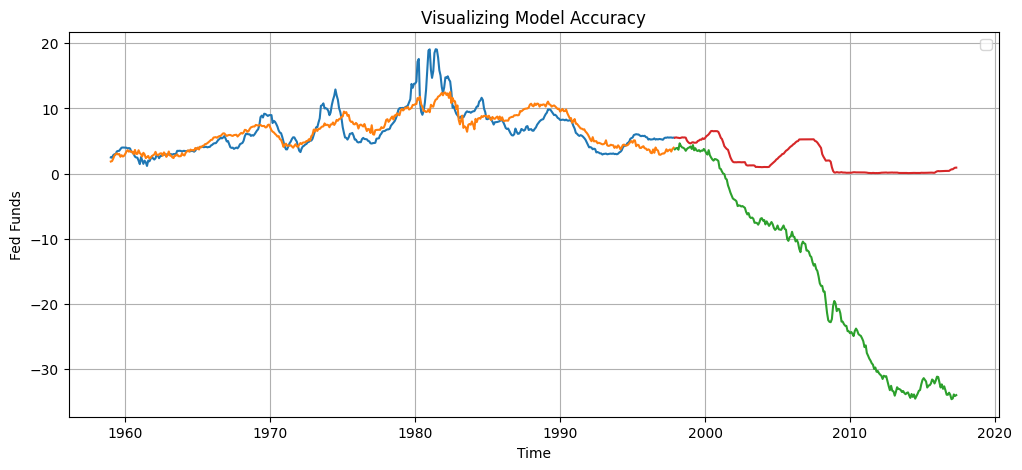

Insample MSE :  3.863477139276067
Outsample MSE :  481.4465099024015
degree: 3


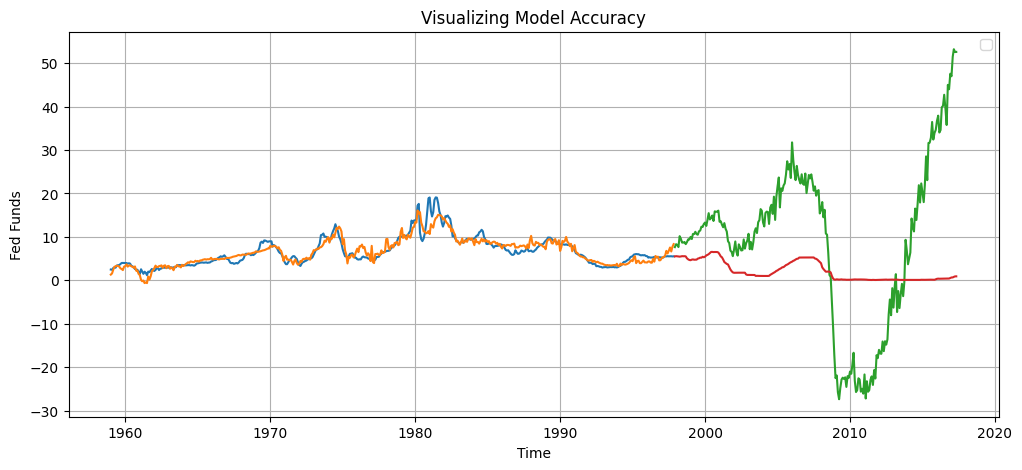

Insample MSE :  1.872363628831326
Outsample MSE :  371.7672613994206


In [68]:
for degrees in range(1,4):
    print("degree:",degrees)
    poly=PolynomialFeatures(degree=degrees)
    X_in_poly=poly.fit_transform(X_in)
    X_out_poly=poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in,X_in_poly).fit()
    
    pred_in=model1.predict(X_in_poly)
    pred_in=pd.DataFrame(pred_in,index=y_in.index)
    pred_out=model1.predict(X_out_poly)
    pred_out=pd.DataFrame(pred_out,index=y_out.index)
    
    plt.figure(figsize = (12,5))
    #需要得到in out和hold的预测结果
    plt.plot(y_in)
    plt.plot(pred_in)
    plt.plot(pred_out)
    plt.plot(y_out)
    
    #plt.plot(model1.predict(pred_in))
    #plt.plot(model1.predict(X_in_poly))
    #plt.plot(model1.predict(X_out_poly))


    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()

    in_mse_1 = mean_squared_error(model1.predict(X_in_poly),y_in)
    out_mse_1 =mean_squared_error(model1.predict(X_out_poly),y_out) 
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

In [44]:
PolynomialFeatures?
#可以给出package的解释

In [48]:
dir(poly)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_combinations',
 '_get_param_names',
 '_get_tags',
 '_max_degree',
 '_min_degree',
 '_more_tags',
 '_n_out_full',
 '_num_combinations',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'degree',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'include_bias',
 'interaction_only',
 'n_features_in_',
 'n_output_features_',
 'order',
 'powers_',
 'set_output',
 'set_params'

# 7.) State your observations :

the model with degree=1 might been underfit, since the prediction curve is too smooth and shows the same degree of difference in fit over the entire time frame

the model with degree=2 and 3 has lower MSE in the sample and higher MSE outside the sample, indicating that there is a serious overfitting problem